In [26]:
import numpy as np
import pandas as pd

# Cargar Data

In [27]:
path='../SOURCES/' 
path_res='%sResults2.csv' %(path)

In [28]:
data = pd.read_csv(path_res, sep=",", header=0,  dtype={'week': str,'year': str})
# data = data.head(100)
data['time'] = data['year']+"-"+data['week']
data.head(10)

,customer_tag,year,week,profile_id,mccg,turn,size,m2t0d0,m2t0d1,m2t0d2,...,m28t3d0,m28t3d1,m28t3d2,m28t3d3,m28t3d4,m28t3d5,m28t3d6,individual_cluster,collective_cluster,time
0,+++g8j9k+5A=,2016,27,0,8,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-27
1,++/oQ9Lb9dI=,2017,22,0,25,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2017-22
2,++14g8obpj0=,2016,36,0,15,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-36
3,++14g8obpj0=,2016,35,1,18,0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-35
4,++14g8obpj0=,2016,31,2,22,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-31
5,++1XMtcwMec=,2016,38,0,5,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-38
6,++3gxZFOJCM=,2016,22,0,18,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30,2016-22
7,++438ugzEhg=,2017,11,0,22,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,45,2017-11
8,++5u+heOZ8o=,2016,43,0,11,2,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-43
9,++70ByX0a3Q=,2016,33,0,22,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27,2016-33


In [29]:
# Lista de Clientes
clientes = data.customer_tag.unique()

In [30]:
# Lista de Periodos

def listar_periodos(time_min,time_max):
    year_min = int(time_min[:4])
    year_max = int(time_max[:4])
    week_min = int(time_min[-2:])
    week_max = int(time_max[-2:])
    
    periodos = []

    if year_min == year_max:
        year = year_min
        for week in range(week_min,week_max+1):
            weeks = ""
            if week < 10:
                weeks = "0"+str(week)
            else:
                weeks = str(week)
            periodos.append(str(year)+"-"+weeks)

    else:
        for year in range(year_min,year_max+1):
            if year == year_min:
                for week in range(week_min,53):
                    weeks = ""
                    if week < 10:
                        weeks = "0"+str(week)
                    else:
                        weeks = str(week)
                    periodos.append(str(year)+"-"+weeks)
            elif year == year_max:   
                for week in range(1,week_max+1):
                    weeks = ""
                    if week < 10:
                        weeks = "0"+str(week)
                    else:
                        weeks = str(week)
                    periodos.append(str(year)+"-"+weeks)
            else:    
                for week in range(1,53):
                    weeks = ""
                    if week < 10:
                        weeks = "0"+str(week)
                    else:
                        weeks = str(week)
                    periodos.append(str(year)+"-"+weeks)
    
    return list(periodos)

lista_periodos = listar_periodos(min(data['time']),max(data['time']))

# Generación de la secuencia de perfiles 

Transformamos la secuencia cronológica de comportamientos en símbolos (corpus), definidos por los perfiles de comportamiento y tomando en cuentas las temporadas sin actividad etiquetandolas como "SinActividad"


In [31]:
corpus=[]
    
for index, cliente in enumerate(clientes):
    lista = []
    for index, periodo in enumerate(lista_periodos):
        lista.append("SinActividad")
        
    corpus.append(lista)   # creamos la lsita de comportamientos en bruto

In [32]:
# cargamos la lista de comportamientos(corpus) con sus valores respectivos.

for i in range(len(data)):
    # en la comportamiendo del cliente_i (extraemos las columnas necesarias)
    fila = data.loc[i,['customer_tag','time','year','week','collective_cluster']]
   
    # en el indice del cliente i_c  y del periodo i_p 
    index_c = list(clientes).index((fila[0]))  # posision de "customer_tag" en la  lista de clientes
    index_p = lista_periodos.index(fila[1])    # posision de "time" en la  lista de periodo  
            
    try:
        num = ""
        if int(fila[4]) < 10:
            num = "0" + str(int(fila[4]))
        else:
            num = str(int(fila[4]))
        
        corpus[index_c][index_p] = "cluster_"+num
    except Exception as e:
        print("Oops!  That was no valid index.  Try again...")
    


In [33]:
len(corpus[0]),len(corpus)

(83, 4016)

# Sequitur para inferir reglas gramaticales

Aplicamos el algoritmo de sequitur para inferir las reglas gramaticales dado por los codigos de los comportamientos, que nos generara "reglas", definida por los simbolos que se repiten en la secuencia.


### Funciones de Apoyo

#### Otras Funciones

In [34]:
# Verifica que los elementos de una lista esten contenidos en otra lista
def elementos_en_lista(lista1, lista2):
    for i in range(len(lista1)):
        if not(lista1[i] in lista2):
            return False    
    return True

#### Algoritmo de Sequitur

In [35]:
from SequiturAlgorithm import run_sequitur

#### Descompresion de Sequitur

In [36]:
# Retorma la logintud de cada regla extendida y la regla estendida
def descomprimir_sequitur(semilla_l,nom_reglas,rs_comprimida,rs_tamaño,rs_extendida):
    num_reglas = len(nom_reglas)
    simbolos_semilla_les = [str(element) for element in list(np.unique(semilla_l))]
    simbolos_derivados = []
    
    incompleto = True
    contador = 0
    
    # 1 prueba: valores on solo 2 elementos
    for i in range(num_reglas):
        if elementos_en_lista(rs_comprimida[i],simbolos_semilla_les):
            rs_extendida[i] = rs_comprimida[i]
            rs_tamaño[i] =  len(rs_extendida[i]) # = 2
            simbolos_derivados.append(nom_reglas[i])  # cargamos la lista de reglas extendidas ya reconstruidas

    while(incompleto):
        # 2 pruebas: iterativas de 2 mas elementos
        for i in range(num_reglas):
            # si su profundidad aun no esta completada
            if rs_tamaño[i]==0:
                # si sus e estan entre los simbolos ya registrados
                if elementos_en_lista(rs_comprimida[i],(simbolos_semilla_les+simbolos_derivados)):
                    # para cada elemento de la lista
                    for e in range(len(rs_comprimida[i])):
                        if rs_comprimida[i][e] in simbolos_semilla_les:
                            rs_extendida[i].append(rs_comprimida[i][e])
                        if rs_comprimida[i][e] in simbolos_derivados:
                            indice = nom_reglas.index(rs_comprimida[i][e])
                            rs_extendida[i] =  rs_extendida[i] + rs_extendida[indice]
                    rs_tamaño[i] =  len(rs_extendida[i])  # actualizamos valor de prifundidad
                    simbolos_derivados.append(nom_reglas[i])  # cargamos la lista de reglas extendida
        
        # 3 Comprobamos que todas las reglas esten llenas
        if not(0 in rs_tamaño):
            incompleto = False

    return rs_tamaño,rs_extendida

### Funcion Principal

In [37]:
def generador_de_reglas(lista_original):
    # Ejecutamos Sequitur
    resp_sequitur = run_sequitur(lista_original)
    reglas = resp_sequitur[0]  # Extraemos solo la lista de reglas (Ver Alg. Sequitur)
    incidencia = resp_sequitur[1]
    
    # Creamos listas para cada regla: nombres,exp comprimidad, numero_incidencias, longitud, exp extendida
    r_nombre = []
    r_comprimida = []
    r_incidencias = []
    r_longitud = []
    r_extendida = []

    for i in range(len(reglas)):
        nombre = 'R'+str(i) 
        profundidad = 0
        # print(nombre,' -> ',reglas[nombre],"  =  ",profundidad)
        r_nombre.append(nombre)
        r_comprimida.append(reglas[nombre])
        r_incidencias.append(int(incidencia[nombre]))  # lista de incidencias
        r_longitud.append(profundidad)    # Inicialmente cargamos con "0"
        r_extendida.append([])               # Inicialmente cargamos con listas vacias

    # Descomprimimos reglas
    resultado = descomprimir_sequitur(lista_original,r_nombre,r_comprimida,r_longitud,r_extendida)

    if len(lista_original)!=len(resultado[1][0]):
        return "Error"

    r_longitud = resultado[0]
    r_extendida = resultado[1]

    return r_nombre, r_comprimida, r_incidencias, r_longitud, r_extendida
    #return r_incidencias,incidencia
    

#### Ejemplo

In [290]:
ejemplo = ["a","a","b","c","a","a","c","b","c"]
generador_de_reglas(ejemplo)

(['R0', 'R1', 'R2'],
 [['R1', 'R2', 'R1', 'c', 'R2'], ['a', 'a'], ['b', 'c']],
 [0, 2, 2],
 [9, 2, 2],
 [['a', 'a', 'b', 'c', 'a', 'a', 'c', 'b', 'c'], ['a', 'a'], ['b', 'c']])

# Validacion de Reglas de Cada Cliente

Aplicamos el algoritmo de sequitur para inferir las reglas gramaticales dado por los codigos de los comportamientos, que nos generara "reglas", definida por los simbolos que se repiten en la secuencia.


In [358]:
ejemplo0 = ["a","a","b","c","a","a","c","b","c","d","d","b","c","d","d","c","b","c","d","d","c","b","c","d","d","c","b","c"]
ejemplo = ejemplo0
dt = generador_de_reglas(ejemplo)

In [359]:
np.unique(ejemplo)

array(['a', 'b', 'c', 'd'], dtype='<U1')

### Funciones de Apoyo

#### Generador de sequencias aleatorias

In [360]:
def random_sequence(seq_original):
    # Fixing random state for reproducibility
    #np.random.seed(19680801)
    tags = list(np.unique(seq_original))                           # Etiquetas de unicas
    length = len(seq_original)                                     # Numero de perfiles unicos del cliente
    sequences = list(np.random.choice(tags, length, replace=True)) # Generamos lista aleatoria
    return sequences

In [361]:
print(ejemplo)

['a', 'a', 'b', 'c', 'a', 'a', 'c', 'b', 'c', 'd', 'd', 'b', 'c', 'd', 'd', 'c', 'b', 'c', 'd', 'd', 'c', 'b', 'c', 'd', 'd', 'c', 'b', 'c']


#### Informacion de la Regla Original

In [362]:
# Datos de la lista Original

reglas_originales = generador_de_reglas(ejemplo)

#-------------------------------------------#
# POSICION      Reglas_originales[POSICION] #
#-------------------------------------------#
#    0              Nombres                 #
#    1              Comprimidas             #
#    2              Incidencias             #
#    3              Longitud                #
#    4              Extendido               #
#-------------------------------------------#
 

reglas_originales_nombre = reglas_originales[0]
reglas_originales_comprimidas = reglas_originales[1]
reglas_originales_incidencias = reglas_originales[2]
reglas_originales_longitud = reglas_originales[3]
reglas_originales_extendido = reglas_originales[4]

#### Generador de Muestra para validar Reglas

In [363]:
# lista original,numeros
def crear_muestra_reglas(lista_original,num = 100):
    
    # Datos de la lista Original
    reglas_originales = generador_de_reglas(lista_original)
    reglas_originales_nombre = reglas_originales[0]
    reglas_originales_comprimidas = reglas_originales[1]
    reglas_originales_incidencias = reglas_originales[2]
    reglas_originales_longitud = reglas_originales[3]
    reglas_originales_extendido = reglas_originales[4]
    
    # Creamos dataframe (nombre_regla, numero_incidencias_en_cada_iteracion, numero_de_iteracion)
    matriz = [[], [], []]


    for i in range(num):                              # para *num* repeticiones
        
        sequencia_aleatoria = random_sequence(lista_original)                # Creamos la lista Aleatoria
        
        # Datos de la lista Aleatoria
        reglas_aleatorias = generador_de_reglas(sequencia_aleatoria)
        reglas_aleatorias_extendidas = reglas_aleatorias[4]  
        reglas_aleatorias_incidencias = reglas_aleatorias[2] 
        
        # Para cada regla de las regla_originales
        for j in range(len(reglas_originales_nombre)):
            
            # Para cada REGLA de las "reglas_originales"
            
            # Buscamos si "REGLA original" apareces entre las "reglas_aleatorias_extendidas" y extraemos su numero de incidencias
            numero_de_incidencia = 0
            for k in range(len(reglas_aleatorias_extendidas)):
                # Si la REGLA (reglas_aleatorias_extendidas) se encuentra en lista de "reglas_aleatorias_extendidas"
                if reglas_originales_extendido[j] == reglas_aleatorias_extendidas[k]:
                    #print(True)
                    numero_de_incidencia = int(reglas_aleatorias_incidencias[k])
        
            # Cargamos fila de la lista Matriz
            matriz[0].append(reglas_originales_nombre[j])   # Guardamos nombre en la lista                
            matriz[1].append(numero_de_incidencia)          # Guardamos numero de iteracion
            matriz[2].append(i)                             # Guardamos numero de iteracion
    
    return matriz
            
            

In [364]:
# Creamos dataframe (nombre_regla, numero_incidencias_en_cada_iteracion, numero_de_iteracion)
m = crear_muestra_reglas(ejemplo,1000)
muestra = pd.DataFrame(data= {'Nombre': m[0], 'Incidencias': m[1], 'Iteracion': m[2]})
muestra.head(10)

,Nombre,Incidencias,Iteracion
0,R0,0,0
1,R1,0,0
2,R2,0,0
3,R3,0,0
4,R4,0,0
5,R0,0,1
6,R1,0,1
7,R2,0,1
8,R3,0,1
9,R4,0,1


In [ ]:
m2 = muestra.loc[muestra['Nombre'] == 'R1']
y = m2.groupby(['Incidencias']).count()      # Us por incidencias
y

In [365]:
m2 = muestra.loc[muestra['Nombre'] == 'R1']
y = m2.groupby(['Incidencias']).count()      # Us por incidencias
y

,Nombre,Iteracion
Incidencias,,
0,816,816
2,155,155
3,28,28
4,1,1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


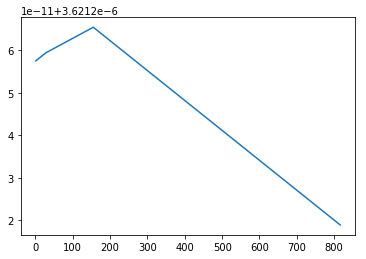

In [366]:
yy = y["Iteracion"].tolist()
mu = np.mean(yy)
median = np.median(yy)
sigma = np.var(yy)
median,sigma,mu

plt.plot(yy,mlab.normpdf(yy, mu, sigma))
plt.show()


In [220]:
# Para cada corpus
#     generar informacion de reglas
#     
#     generar muestra
#     
#     validar z-score
#     
#     retornar reglas validas

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


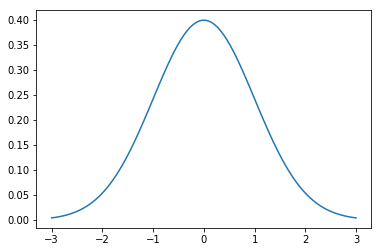

In [85]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()



In [322]:
len(clientes)

4016

In [321]:
len(corpus)

4016

In [369]:
# Reglas validas
# Cliente  Regla ocurrencias
reglas_validas = [[], [], []]

for i in range(len(clientes)):
    # Extraer Reglas validad  == funcion get rules
    # para cada regla
    #    
    
        reglas_validas[0].append(clientes[i])
        reglas_validas[1].append(i)
        reglas_validas[2].append(i*i)

In [368]:
reglas_validas

pd.DataFrame(data= {'Cliente':reglas_validas[0], 'Regla': reglas_validas[1], 'Incidencias': reglas_validas[2]})

,Cliente,Regla,Incidencias
0,+++g8j9k+5A=,0,0
1,++/oQ9Lb9dI=,1,1
2,++14g8obpj0=,2,4
3,++1XMtcwMec=,3,9
4,++3gxZFOJCM=,4,16
5,++438ugzEhg=,5,25
6,++5u+heOZ8o=,6,36
7,++70ByX0a3Q=,7,49
8,++7i5fi6kBU=,8,64
9,++834mPfd7g=,9,81
